## Analiza 5000 najpopularnejših albumov na strani Rate Your Music ##

Za temo svoje projektne naloge pri predmetu Programiranje 1 sem si izbrala analizo podatkov popularnih albumov na spletni strani [Rate Your Music](https://rateyourmusic.com/charts/popular/album/all-time/). Stran je namenjena beleženju, ocenjevanju in komentiranju glasbe izvajalcev vseh možnih žanrov, iz raznih koncev sveta, s poudarki na njihovih albumskih izdajah. Podatki so bili zajeti februarja 2022\*.

Najprej bomo uvozili pobrane podatke in si za začetek pogledali kako tabela z albumi izgleda, nato se bomo pa poglobili v analizo.


\* Za analizo bi se spodobilo podatke posodobit vsaj na letošnje leto, vendar se bom zaradi večjih težav pri zajemanju strani (izjemna naklonjenost strani, da me blokira kar pri prvem zajemu strani, tudi po poskusih možnih rešitev asistentov in sošolcev) trenutno zadovoljila s starejšimi. Žal bodo zato iz lestvice izpuščeni nekateri odlični albumi, ki so bili izdani (ali dobili prepoznavnost) v zadnjem letu in pol.

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 12  #omeji pokazane vrstice na 12

albumi = pd.read_csv('obdelani-podatki/albumi.csv', index_col=0)  
#index_col=0 poskrbi, da nimamo še enega nepotrebnega in zamaknjenega stolpca za indeksiranje vrstic

albumi

,id,naslov,izvajalec,datum izdaje,povprecna ocena,stevilo ocen,stevilo kritik,zanri,sekundarni zanri,oznake
mesto,,,,,,,,,,
1,45,OK Computer,Radiohead,16 June 1997,4.24,73326,1535,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, male vocals,..."
2,46,Kid A,Radiohead,3 October 2000,4.23,61102,757,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp..."
3,976,The Dark Side of the Moon,Pink Floyd,23 March 1973,4.21,59702,1551,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi..."
4,355,Loveless,My Bloody Valentine,11 November 1991,4.24,52567,1252,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ..."
5,3050748,My Beautiful Dark Twisted Fantasy,Kanye West,22 November 2010,4.08,51381,636,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist..."
...,...,...,...,...,...,...,...,...,...,...
4996,28348,What Color Is Love,Terry Callier,August 1972,3.86,2151,45,"Chicago Soul, Soul","Psychedelic Soul, Contemporary Folk, Singer/So...","romantic, male vocals, warm, mellow, lush, soo..."
4997,40314,The Ultra-Violence,Death Angel,23 April 1987,3.75,2151,36,Thrash Metal,Technical Thrash Metal,"energetic, aggressive, heavy, raw, violence, m..."
4998,8789625,The Life of Pi'erre 4,Pi'erre Bourne,21 June 2019,3.12,2151,24,"Pop Rap, Trap","Alternative R&B, Cloud Rap, Plugg","psychedelic, repetitive, love, atmospheric, wa..."



V zgornjem koraku smo torej uvozili naše podatke, kjer lahko vidimo, da smo poleg naslova albuma na lestvici in njegovega izvajalca (oz. izvajalcev) zajeli tudi mesto na lestvici, ID albuma, datum izdaje, povprečno oceno, število glasov in kritik na albumu, zraven žanrov in sekundarnih žanrov pa tudi oznake. 

Za dodatno razlago nekaterih stolpcev, ID albuma je albumu unikatna koda, določena od spletne strani, sekundarni žanri so pa takšni, ki se sicer na albumu pojavljajo, vendar načeloma ne skozi celoto, zgolj na kakšni pesmi ali parih.
Vidimo, da najpopularnejši album na lestvici ima 73326 ocen, zadnji na lestvici pa ima ocen 2150, s čimer se lahko tudi prepričamo da smo najpomembnejše in najbolj poznane albume za analizo podatkov zagotovo zajeli.

Za nadaljnjo motivacijo se pa še pred poglobitvijo v analizo spomnimo na obstoj par odličnih albumov na tej lestvici:

In [293]:
albumi.sort_values('povprecna ocena', ascending=False).head(12)

,id,naslov,izvajalec,datum izdaje,povprecna ocena,stevilo ocen,stevilo kritik,zanri,sekundarni zanri,oznake
mesto,,,,,,,,,,
143,17906,The Black Saint and the Sinner Lady,Mingus,July 1963,4.34,21281,369,"Avant-Garde Jazz, Third Stream","Experimental Big Band, Flamenco Jazz","instrumental, complex, passionate, suite, dens..."
12,2328,In the Court of the Crimson King,King Crimson,10 October 1969,4.30,46901,831,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph..."
11,6286502,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,4.30,47015,410,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry","political, conscious, poetic, protest, concept..."
88,10702,A Love Supreme,John Coltrane,February 1965,4.30,26146,440,Spiritual Jazz,"Modal Jazz, Post-Bop","improvisation, passionate, spiritual, instrume..."
7,974,Wish You Were Here,Pink Floyd,12 September 1975,4.30,50743,1000,"Progressive Rock, Art Rock","Space Rock, Psychedelic Rock","melancholic, atmospheric, progressive, male vo..."
23,142671,Madvillainy,Madvillain,23 March 2004,4.28,38061,395,Abstract Hip Hop,"Jazz Rap, Experimental Hip Hop, Instrumental H...","sampling, playful, humorous, cryptic, abstract..."
17,623,The Rise and Fall of Ziggy Stardust and the Sp...,David Bowie,16 June 1972,4.26,41245,730,"Glam Rock, Pop Rock","Art Rock, Rock Opera","science fiction, melodic, male vocals, concept..."
13,12,Abbey Road,The Beatles,26 September 1969,4.25,46534,972,Pop Rock,"Psychedelic Pop, Progressive Pop","melodic, warm, male vocals, bittersweet, summe..."
27,1036,Remain in Light,Talking Heads,8 October 1980,4.25,37832,525,"New Wave, Post-Punk","Funk, Afrobeat, Experimental Rock, Dance-Punk","rhythmic, anxious, energetic, male vocals, pla..."


Ogledamo si lahko tudi specifične izvajalce, ki nas zanimajo. 
Pa se v uvodu še spomnimo na obstoj nekaterih izjemnih ustvarjalcev in si oglejmo njihove pojavitve na lestvici.

In [294]:
ElliottSmith = albumi.loc[albumi['izvajalec'].str.contains("Elliott Smith", case=False)]

ElliottSmith

,id,naslov,izvajalec,datum izdaje,povprecna ocena,stevilo ocen,stevilo kritik,zanri,sekundarni zanri,oznake
mesto,,,,,,,,,,
110,1311,Either / Or,Elliott Smith,25 February 1997,4.11,23481,274,"Singer/Songwriter, Indie Folk","Indie Pop, Lo-Fi / Slacker Rock","melancholic, mellow, acoustic, depressive, int..."
440,1312,XO,Elliott Smith,25 August 1998,3.96,12983,156,"Singer/Songwriter, Indie Pop","Chamber Pop, Indie Folk","melancholic, melodic, bittersweet, male vocals..."
504,1310,Elliott Smith,Elliott Smith,21 July 1995,3.91,11873,142,"Singer/Songwriter, Indie Folk",NaN,"acoustic, melancholic, sad, drugs, lonely, bit..."
800,1313,Figure 8,Elliott Smith,18 April 2000,3.80,9015,147,"Singer/Songwriter, Indie Pop","Chamber Pop, Indie Rock, Indie Folk","melancholic, melodic, male vocals, bittersweet..."
996,1309,Roman Candle,Elliott Smith,14 July 1994,3.79,7809,96,"Singer/Songwriter, Indie Folk","Contemporary Folk, Lo-Fi / Slacker Rock","melancholic, acoustic, sombre, male vocals, me..."
1202,84906,From a Basement on the Hill,Elliott Smith,19 October 2004,3.83,6869,117,"Singer/Songwriter, Indie Rock","Indie Folk, Lo-Fi / Slacker Rock","melancholic, melodic, drugs, depressive, dense..."


In [295]:
DavidBowie = albumi.loc[albumi['izvajalec'].str.contains("David Bowie", case=False)]

DavidBowie

,id,naslov,izvajalec,datum izdaje,povprecna ocena,stevilo ocen,stevilo kritik,zanri,sekundarni zanri,oznake
mesto,,,,,,,,,,
17,623,The Rise and Fall of Ziggy Stardust and the Sp...,David Bowie,16 June 1972,4.26,41245,730,"Glam Rock, Pop Rock","Art Rock, Rock Opera","science fiction, melodic, male vocals, concept..."
60,629,Low,David Bowie,14 January 1977,4.13,30253,526,"Art Rock, Ambient","Ambient, Electronic, Art Pop, Krautrock","atmospheric, lonely, futuristic, sombre, melan..."
72,622,Hunky Dory,David Bowie,17 December 1971,4.03,28704,519,"Pop Rock, Glam Rock, Art Rock","Singer/Songwriter, Piano Rock, Art Pop, Baroqu...","playful, melodic, quirky, male vocals, warm, l..."
86,6853748,★ [Blackstar],David Bowie,8 January 2016,4.08,26644,306,Art Rock,"Jazz-Rock, Experimental Rock, Electronic","dark, death, introspective, poetic, male vocal..."
111,630,"""Heroes""",David Bowie,14 October 1977,3.98,23305,298,Art Rock,"Ambient, Electronic, Art Pop, Krautrock","futuristic, atmospheric, anxious, male vocals,..."
...,...,...,...,...,...,...,...,...,...,...
2238,634,Tonight,David Bowie,24 September 1984,2.42,4286,124,"Pop Rock, Dance-Pop, New Wave","Sophisti-Pop, Pop Reggae, Pop Soul","playful, energetic, male vocals, nocturnal, tr..."
2244,68032,Reality,David Bowie,15 September 2003,3.19,4279,110,"Pop Rock, Alternative Rock","Art Rock, Art Pop","introspective, energetic, male vocals, melodic..."
2650,635,Never Let Me Down,David Bowie,27 April 1987,2.15,3740,140,Pop Rock,AOR,"male vocals, playful, dense, energetic, melodi..."


In [296]:
Low = albumi.loc[albumi['izvajalec'].str.strip() == 'Low']

Low

,id,naslov,izvajalec,datum izdaje,povprecna ocena,stevilo ocen,stevilo kritik,zanri,sekundarni zanri,oznake
mesto,,,,,,,,,,
554,18447,I Could Live in Hope,Low,18 February 1994,3.86,11277,138,Slowcore,Dream Pop,"lonely, melancholic, sad, lethargic, depressiv..."
1254,13272216,HEY WHAT,Low,10 September 2021,3.69,6673,71,"Post-Industrial, Ambient Pop, Experimental Rock","Noise, Electroacoustic, Glitch Pop, Drone, Amb...","noisy, spiritual, abstract, atmospheric, femal..."
1298,9324566,Double Negative,Low,14 September 2018,3.59,6503,73,"Ambient Pop, Glitch Pop","Drone, Post-Industrial, Slowcore, Electroacoustic","atmospheric, noisy, melancholic, ethereal, mal..."
1727,5377,Things We Lost in the Fire,Low,21 January 2001,3.76,5319,58,Slowcore,Chamber Pop,"melancholic, atmospheric, sad, mellow, letharg..."
3948,9535,Long Division,Low,23 May 1995,3.58,2673,34,Slowcore,Dream Pop,"melancholic, sad, lonely, calm, depressive, co..."
4078,18448,The Curtain Hits the Cast,Low,13 August 1996,3.71,2600,30,Slowcore,"Dream Pop, Drone","sad, bittersweet, lonely, introspective, letha..."
4540,22651,Trust,Low,21 October 2002,3.67,2366,37,Slowcore,"Dream Pop, Post-Rock","sad, lethargic, sombre, melancholic, atmospher..."
4884,186124,The Great Destroyer,Low,25 January 2005,3.55,2200,49,Indie Rock,"Slowcore, Noise Rock","female vocals, male vocals, melancholic, mello..."


## Najbolj priljubljeni izvajalci ##

V tem izdelku se bomo nekoliko bolj osredotočili na izvajalce na lestvici, poiskali najbolj priljubljene in jih primerjali po ocenah. 
Najprej poglejmo, s katerimi izvajalci imamo opravka. Zelo samozavestno lahko predvidevamo, da bo izvajalcev manj, kot imamo albumov na lestvici. Videli bomo torej, da se v naših podatkih skriva 2069 izvajalcev.

Nato si pa oglejmo tudi, kateri od ustvarjalcev z največ svojimi izdajami zasedajo mesto na lestvici.

In [297]:
vsi_izvajalci = albumi['izvajalec'].unique()

stolpec_izvajalcev = pd.DataFrame({'Izvajalci': vsi_izvajalci})
stolpec_izvajalcev

,Izvajalci
0,Radiohead
1,Pink Floyd
2,My Bloody Valentine
3,Kanye West
4,Neutral Milk Hotel
...,...
2064,Third Ear Band
2065,Moonspell
2066,CupcakKe
2067,Terry Callier


In [298]:
stevilo_pojavitev = albumi['izvajalec'].value_counts()

stevilo_pojavitev

izvajalec
Bob Dylan                   24
David Bowie                 24
Rush                        20
The Rolling Stones          18
Miles Davis                 17
                            ..
Richard & Linda Thompson     1
Little Richard               1
Hermit and the Recluse       1
Helmet                       1
Death Angel                  1
Name: count, Length: 2069, dtype: int64

In [299]:
stevilo_izvajalcev_z_albumi = stevilo_pojavitev.value_counts().sort_index()

stevilo_izvajalcev_z_albumi

count
1     1085
2      397
3      200
4      119
5       75
      ... 
16       6
17       2
18       1
20       1
24       2
Name: count, Length: 20, dtype: int64

<Axes: xlabel='Število albumov izvajalca na lestvici', ylabel='Število izvajalcev'>

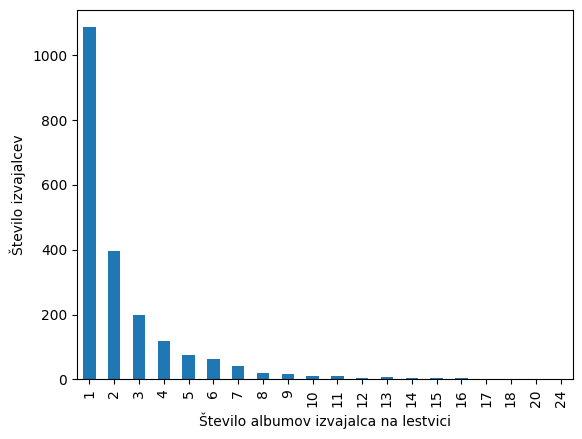

In [300]:
stevilo_izvajalcev_z_albumi.plot(kind ='bar', xlabel='Število albumov izvajalca na lestvici', ylabel='Število izvajalcev')

Vidimo torej, da v številčnosti popularnih izdaj kraljujeta Bob Dylan in David Bowie, oba s svojima razsežnima diskografijama. 

V zgornjem grafu smo še predstavili število izvajalcev, ki imajo določeno količino albumov na lestvici. Sama sem morda pričakovala, da si bodo začetni seštevki albumov po številu izvajalcev bližje, a vidimo da je skoraj četrtina izvajalcev takšnih, ki so priljubljenost dobili na eni izdaji. Že zaradi dejstva, da je dosti glasbenikov med priljubljenimi albumi takšnih, ki so še sredi svoje dobe ustvarjanja, je pa sicer pričakovati, da bodo seštevki (popularnih) izdaj pogosto manjši. Tudi prva mesta v večini samozavestno zasedajo ustvarjalci, ki so svoj glasbeni opus že dokončali.

## Analiza žanrov ##

Ogledali si bomo tudi vzorce v žanrih albumov iz lestvice. 

V stolpcu 'žanri' so našteti žanri, ki opisujejo album kot celoto, v stolpcu 'sekundarni žanri' pa vidimo žanre, ki se sicer na albumu pojavijo, a označujejo zgolj kakšno pesem. Pričakujem, da bo najbolj zastopan žanr rock (in razne njegove veje).

Najprej se bomo osredotočili na (primarne) žanre. Oglejmo si kateri med njimi so najbolj zastopani.

In [301]:
vsi_zanri = albumi['zanri'].str.split(', ').explode().value_counts()

vsi_zanri

zanri
Alternative Rock     340
Singer/Songwriter    333
Pop Rock             290
Indie Rock           273
Hard Rock            208
                    ... 
Latin Electronic       1
Microsound             1
Soul Jazz              1
Hip House              1
Blues                  1
Name: count, Length: 487, dtype: int64

Oglejmo si, kakšna je zastopanost žanrov pri najbolje ocenjenih izdajah in kakšna pri najslabše ocenjenih. 

In [302]:
dobri_albumi = albumi[albumi['povprecna ocena'] > 4]
dobri_zanri = dobri_albumi['zanri'].str.split(', ').explode().value_counts()
# Če preštejemo dobre albume: stevilo_vseh_dobrih_albumov = len(dobri_albumi),
# jih dobimo 168

dobri_zanri.head(12)


zanri
Singer/Songwriter     19
Art Rock              17
Pop Rock              14
Post-Rock              8
East Coast Hip Hop     8
Progressive Rock       8
Post-Punk              7
Contemporary Folk      7
Folk Rock              7
Boom Bap               6
Experimental Rock      6
Film Score             5
Name: count, dtype: int64

<Axes: title={'center': 'Zastopanost žanrov med najbolje ocenjenimi albumi'}>

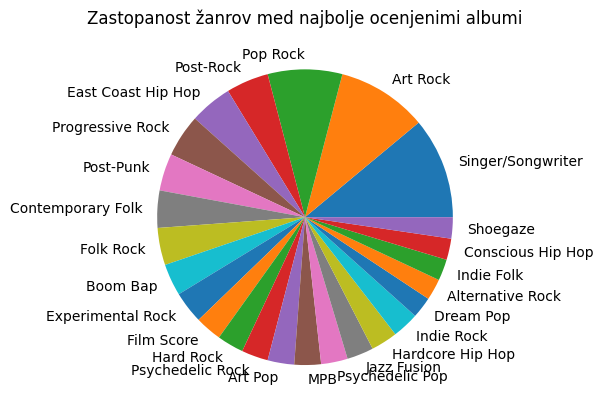

In [327]:
popularni_zanri = dobri_zanri[dobri_zanri >= 4]
# z 'dobri_zanri' sem poimenovala funkcijo, ki pokaže kolikokrat se določen žarn pojavi. 
# Torej se osredotočimo na žanre, ki se med dobro ocenjenimi albumi pojavijo vsaj štirikrat.

plt.title('Zastopanost žanrov med najbolje ocenjenimi albumi')
popularni_zanri.plot.pie(ylabel='')

Brez težav se opazi torej, da se pri najbolje ocenjenih albumih pojavijo tudi najboljši žanri (po skromni subjektivni presoji avtorice te analize).
Kot dodatno razlago, bi zgolj dodala, da žanr 'Singer/Songwriter', ki zaseda prvo mesto, ne zajema vseh solo izvajalcev (kot bi se morda na prvo žogo sklepalo), temveč glasbo, ki se močno naslanja na besedila in tekstopisje. Predstavnika tega bi bila naprimer [Nick Drake](https://rateyourmusic.com/artist/nick-drake) in [Fiona Apple](https://rateyourmusic.com/artist/fiona-apple).

Zanimalo me je pa tudi, če je med najbolje ocenjenimi albumi kakšen zastopnik iz bolj težkih kitarskih vod, ki je v splošnem morda širši publiki nekoliko manj pri srcu.

In [304]:
dobri_metal_albumi = dobri_albumi[
    dobri_albumi['zanri'].str.contains('metal', case=False, na=False)|dobri_albumi['sekundarni zanri'].str.contains('metal', case=False, na=False)
    ]
dobri_metal_albumi

,id,naslov,izvajalec,datum izdaje,povprecna ocena,stevilo ocen,stevilo kritik,zanri,sekundarni zanri,oznake
mesto,,,,,,,,,,
29,2276,Paranoid,Black Sabbath,18 September 1970,4.20,37294,592,"Heavy Metal, Hard Rock","Traditional Doom Metal, Blues Rock","dark, heavy, war, political, ominous, male voc..."
49,1593,Master of Puppets,Metallica,3 March 1986,4.01,31788,734,Thrash Metal,NaN,"aggressive, heavy, angry, energetic, male voca..."
71,1225777,Ride the Lightning,Metallica,30 July 1984,4.06,28714,548,Thrash Metal,NaN,"heavy, energetic, aggressive, male vocals, dar..."
89,2157,Black Sabbath,Black Sabbath,13 February 1970,4.06,25898,565,"Heavy Metal, Hard Rock","Blues Rock, Traditional Doom Metal","occult, dark, fantasy, ominous, sombre, male v..."
93,2277,Master of Reality,Black Sabbath,21 July 1971,4.12,25190,450,Heavy Metal,"Traditional Doom Metal, Doom Metal","heavy, dark, male vocals, sombre, rhythmic, no..."
105,1711,The Downward Spiral,Nine Inch Nails,8 March 1994,4.02,23942,419,Industrial Rock,"Industrial Metal, Electro-Industrial, Art Rock","misanthropic, suicide, angry, dark, nihilistic..."
343,4203,Symbolic,Death,21 March 1995,4.08,14602,225,Technical Death Metal,Progressive Metal,"philosophical, complex, technical, passionate,..."


So! Vendar je nabor morda nekoliko predvidljiv in nezanimiv.

<Axes: title={'center': 'Najpogostejši žanri slabo ocenjenih izdaj'}>

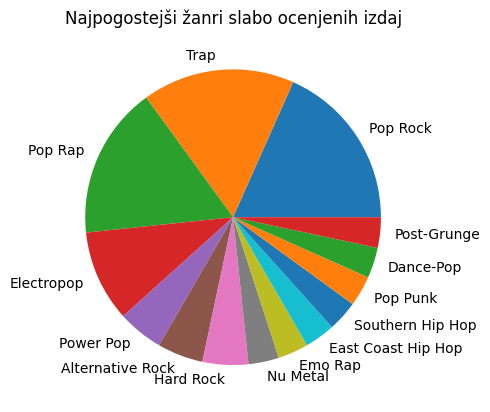

In [328]:
slabi_albumi = albumi[albumi['povprecna ocena'] < 2]
slabi_zanri = slabi_albumi['zanri'].str.split(', ').explode().value_counts()
nepopularni_zanri = slabi_zanri[slabi_zanri >= 2]

plt.title('Najpogostejši žanri slabo ocenjenih izdaj')
nepopularni_zanri.plot.pie(ylabel='')

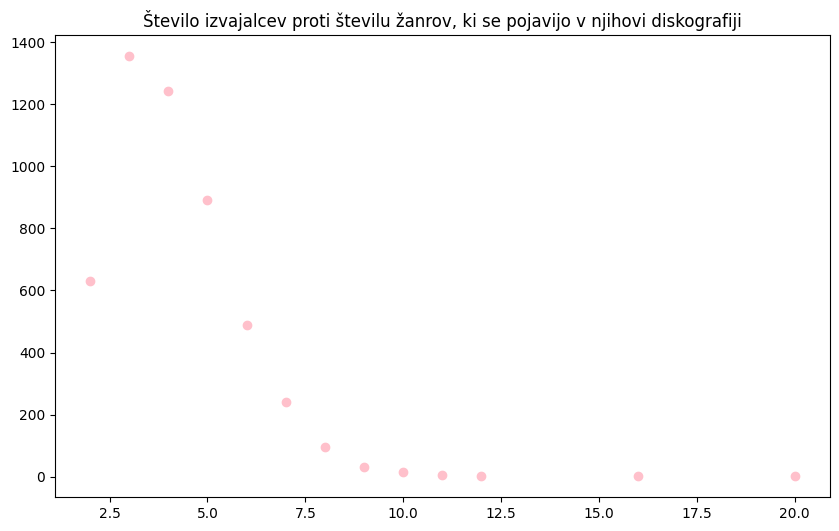

In [334]:
albumi['vsi zanri'] = albumi['zanri'].fillna('') + ', ' + albumi['sekundarni zanri'].fillna('')
albumi['stetje zanrov'] = albumi['vsi zanri'].apply(lambda x: len(x.split(', ')))

stetje_zanrov = albumi.groupby('stetje zanrov').size().reset_index(name='stetje izvajalcev')

plt.figure(figsize=(10, 6))
plt.title('Število izvajalcev proti številu žanrov, ki se pojavijo v njihovi diskografiji')
plt.scatter(
    x=stetje_zanrov['stetje zanrov'],
    y=stetje_zanrov['stetje izvajalcev'],
    c='pink', 
)

## Analiza oznak ##

Stran Rate Your Music ima možnost albumom dodat tudi oznake. Vseh skupaj je 215, ki so razdeljene v 6 večjih skupin: 

- Vzdušje (Atmosphere)

Nanaša se na znane občutke in slike, ki se posredujejo poslušalcu. Atmosfera se od razpoloženja razlikuje po tem, da je slednje v veliki meri povezano s čustvi, ne s podobami.
 *(dark, suspenseful, warm, ...)*

- Glasbena oblika (Form) 

Glasbena oblika opisuje celotno strukturo glasbenega dela. Natančneje, lahko definira vrstni red in vrsto različnih odsekov v pesmi, instrumente, ki se uporabljajo, in/ali druge vidike glasbene kompozicije. 
*(ballad, acoustic, orchestral, ...)*

- Besedilo (Lyrics)

Besedilo pesmi je sestavljeno iz vsebine ali teme in načina, kako so izražene skozi ton pevca. 
*(abstract, fantasy, religious, ...)*

- Razpoloženje (Mood) 

Razpoloženje glasbe se nanaša na čustva, ki se prenašajo ob poslušanju. Razpoloženje se od vzdušja razlikuje po tem, da je slednje v veliki meri povezano s podobami, ne s čustvi. 
*(angry, happy, mellow, ...)*

- Slog (Style) 

Glasbeni slog opisuje, kako se uporablja eden ali več vidikov glasbe, kot so melodija, harmonija, ritem, tember, tempo, dinamika in oblika. Beseda "slog" se včasih uporablja kot sopomenka "zvrst", vendar je veliko bolj specifična in podrobna ter označuje posebne značilnosti glasbe in ne zvoka kot celote. 
*(avant-garde, heavy, noisy, ...)*

- Tehnika (Tehnique) 

Tehnike v glasbi opisujejo, kako je nastala, na primer metode in orodja, uporabljena pri njeni kompoziciji in produkciji. 
*(uncommon time signatures, improvisation, ...)*


Najprej bomo primerjali oznaki *female vocals* in *male vocals*, da vidimo kakšno je zastopanje obeh plati (vsaj v neinstrumentalnih izdajah). 
Albume s tema dvema oznakama bomo primerjali po povprečnih ocenah in si ogledali v kolikšnem deležu kateri prevladuje.


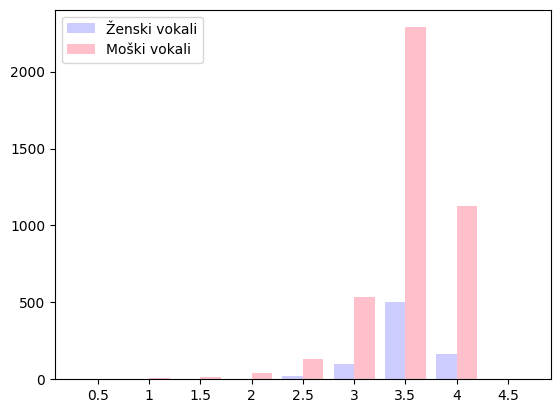

In [307]:
def zaokrozimo(stevilo):
    return round(stevilo * 2.0) / 2.0
#Ta funkcija zaokroži na najbližjo polovico

X = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

albumi['zaokrozena ocena'] = albumi['povprecna ocena'].apply(zaokrozimo)

albumi_z_zenskimi_vokali = albumi[albumi['oznake'].str.contains('female vocals', case=False)]
stevilo_albumov_z_zenskimi_vokali = albumi_z_zenskimi_vokali.groupby('zaokrozena ocena').size().reindex(X, fill_value=0)
#grupiramo po zaokroženi oceni
sez1 = stevilo_albumov_z_zenskimi_vokali.tolist()

albumi_z_moskimi_vokali = albumi[albumi['oznake'].str.contains('male vocals', case=False)]
stevilo_albumov_z_moskimi_vokali = albumi_z_moskimi_vokali.groupby('zaokrozena ocena').size().reindex(X, fill_value=0)
sez2 = stevilo_albumov_z_moskimi_vokali.tolist()

x_os = np.arange(len(X))

plt.bar(x_os - 0.2, sez1, 0.4, label='Ženski vokali', color='#CCCCFF')
plt.bar(x_os + 0.2, sez2, 0.4, label='Moški vokali', color='pink')

plt.xticks(x_os, X)
plt.ylabel=('Število albumov s to oznako')
plt.legend()

Za dodatno predstavo si pa lahko ogledamo tudi, kako ti podatki izgledajo v odstotkih

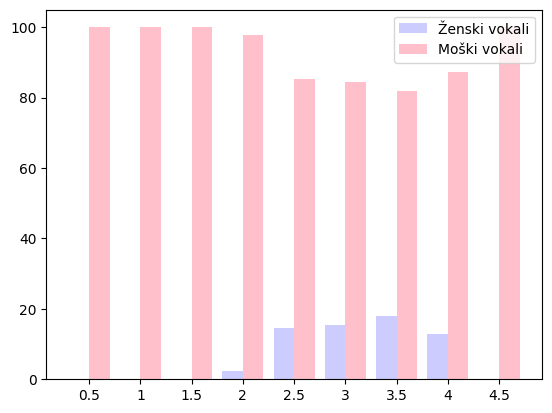

In [309]:
vsi_albumi = stevilo_albumov_z_zenskimi_vokali + stevilo_albumov_z_moskimi_vokali

odstotki_zenskih_vokalov = (stevilo_albumov_z_zenskimi_vokali / vsi_albumi) * 100
odstotki_moskih_vokalov = (stevilo_albumov_z_moskimi_vokali / vsi_albumi) * 100

x_os = np.arange(len(X))

plt.bar(x_os - 0.2, odstotki_zenskih_vokalov, 0.4, label='Ženski vokali', color='#CCCCFF')
plt.bar(x_os + 0.2, odstotki_moskih_vokalov, 0.4, label='Moški vokali', color='pink')

plt.xticks(x_os, X)
#plt.xlabel('Zaokrožena ocena albuma')
#plt.ylabel('Delež v odstotkih')
plt.legend()
plt.show()

Zagotovo se da razbrati, da so moški vokali dosti pogostejša oznaka, kot ženski vokali. Ogledamo si pa lahko tudi, kako je z njihovimi pojavitvami skozi leta.


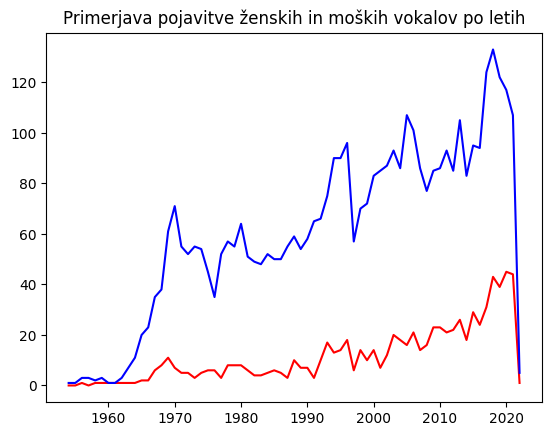

In [333]:
def izlusci_leto(datum):
    deli_datuma = datum.split()
    for del_datuma in deli_datuma:
        if del_datuma.isdigit() and len(del_datuma)==4:
            return int(del_datuma)
    return None

albumi['leto izdaje'] = albumi['datum izdaje'].apply(izlusci_leto)
leta = albumi['leto izdaje'].unique()
leta.sort()

def prestej(leto, vokal):
    leto_izdaje = albumi[(albumi['leto izdaje'] == leto) & (albumi['oznake'].str.contains(vokal, case=False))]
    stevilo = len(leto_izdaje)
    return stevilo

zenski_vokali_na_leto = [prestej(leto, 'female vocals') for leto in leta]
moski_vokali_na_leto = [prestej(leto, 'male vocals') for leto in leta]

plt.title('Primerjava pojavitve ženskih in moških vokalov po letih')
plt.plot(leta, zenski_vokali_na_leto, color='r')
plt.plot(leta, moski_vokali_na_leto, color='b')

Za konec si oglejmo še kako se pa primerjajo albumi po pozitivnih oz. negativnih oznakah.

Na lastno presojo sem najpogostejše oznake za vzdušje in razpoloženje razdelila na skupini pozitivnih in negativnih oznak. Za konec sem si želela še ogledati, če uporabnike strani Rate Your Music nagovarjajo bolj negativne oznake. Predvidevam, da bo temu tako, še posebej, ker so kakšne melanholične ali temne oznake bolj resno vzete. Zaradi relativne širine oznak in albumov, sklepam tudi, da bodo nekateri ustrezali obema kategorijama.

In [331]:
pozitivne_oznake = 'calm|energetic|happy|playful|uplifting|triumphant|optimistic|warm'
negativne_oznake = 'angry|agressive|alienation|anxious|melancholic|sad|depressive|lonely|sombre|pessimistic|dark'

pozitivni_albumi = albumi[albumi['oznake'].str.contains(pozitivne_oznake, case=False, na=False)]
negativni_albumi = albumi[albumi['oznake'].str.contains(negativne_oznake, case=False, na=False)]

st_pozitivnih_albumov = len(pozitivni_albumi)
st_negativnih_albumov = len(negativni_albumi)

(st_pozitivnih_albumov, st_negativnih_albumov)

(2912, 2484)

Moja hipoteza je torej napačna. Med najpopularnejšimi albumi se skriva več albumov s pozitivnimi oznakami, kar je dobra novica za uporabnike strani. Sem povprečnemu poslušalcu v hipotezi vzela več volje do življenja, kot bi si ta zaslužil, pojavitev pozitivnih oznak pa podcenila.

## Zaključek ##

S tem podatkom pa tudi končujemo analizo najpopularnejših albumov. Upam da je ta analiza podatkov ponudila bežen vpogled v podatke glasbenega sveta in da vzpodbudi nadaljnje zanimanje.

Najprej smo si ogledali, kako naši podatki sploh izgledajo in se nato nekoliko osredotočili na izvajalce. Brez presenečenj po številu izdaj vodita kultna glasbenika, ugotovili smo pa tudi, da največ izvajalcev nastopa na seznamu z eno izdajo. Pri poglobitvi v žanre, smo se posebej osredototčili na žanre dobro ocenjenih in slabo ocenjenih izdaj, na koncu smo pa že nekoliko globje pogledali v oznake in primerjali albume z ženskimi in albume z moškimi vokali. Končali smo s primerjavo pozitivnih in negativnih opisnikov. 

V veliki večini podatki niso bili presenetljivi, so pa ponudili konkretne odgovore in vpogled, s katerim se lahko naprej usmerjamo.